In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib



In [4]:
# Load training features (X_train) and labels (y_train) from CSV files
X_train = pd.read_csv('../X_train_res.csv')
y_train = pd.read_csv('./preprocessed/y_train_res.csv')

# Load testing features (X_test) and labels (y_test) from CSV files
X_test = pd.read_csv('./preprocessed/X_test.csv')
y_test = pd.read_csv('./preprocessed/y_test.csv')

In [7]:
# Create the Logistic Regression model
logreg_model = LogisticRegression(max_iter=20000, verbose=1)  # max_iter to ensure convergence for complex data

# Train the model
logreg_model.fit(X_train, y_train.values.ravel())  # Flatten y_train if it's a DataFrame

# Save the trained model to a file
joblib.dump(logreg_model, 'logreg_model_raw.pkl')
print("Model saved to 'logreg_model_raw.pkl'")

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.68012D+06    |proj g|=  4.77173D+08


 This problem is unconstrained.



At iterate   50    f=  6.91558D+06    |proj g|=  6.53039D+06

At iterate  100    f=  6.82826D+06    |proj g|=  4.67589D+06

At iterate  150    f=  6.69280D+06    |proj g|=  7.37986D+06

At iterate  200    f=  6.49951D+06    |proj g|=  3.67713D+07

At iterate  250    f=  6.42515D+06    |proj g|=  2.54231D+07

At iterate  300    f=  4.96844D+06    |proj g|=  3.20932D+08

At iterate  350    f=  4.70703D+06    |proj g|=  2.56330D+07

At iterate  400    f=  4.62635D+06    |proj g|=  8.36035D+06

At iterate  450    f=  4.47332D+06    |proj g|=  3.11259D+06

At iterate  500    f=  4.26147D+06    |proj g|=  6.98791D+06

At iterate  550    f=  4.13452D+06    |proj g|=  6.90925D+06

At iterate  600    f=  4.05720D+06    |proj g|=  3.19155D+06

At iterate  650    f=  4.05148D+06    |proj g|=  1.25760D+06

At iterate  700    f=  4.05020D+06    |proj g|=  2.31323D+06

At iterate  750    f=  4.04969D+06    |proj g|=  4.81893D+05

At iterate  800    f=  4.04881D+06    |proj g|=  4.67785D+05

At iter


At iterate 6700    f=  3.79232D+06    |proj g|=  6.53793D+05

At iterate 6750    f=  3.78834D+06    |proj g|=  4.31850D+06

At iterate 6800    f=  3.78606D+06    |proj g|=  1.16842D+06

At iterate 6850    f=  3.78557D+06    |proj g|=  4.40478D+05

At iterate 6900    f=  3.78506D+06    |proj g|=  4.33469D+05

At iterate 6950    f=  3.78494D+06    |proj g|=  5.39454D+05

At iterate 7000    f=  3.78483D+06    |proj g|=  1.18750D+06

At iterate 7050    f=  3.78455D+06    |proj g|=  3.38248D+05

At iterate 7100    f=  3.78429D+06    |proj g|=  9.59026D+05

At iterate 7150    f=  3.78370D+06    |proj g|=  6.56164D+05

At iterate 7200    f=  3.78231D+06    |proj g|=  1.83509D+06

At iterate 7250    f=  3.78146D+06    |proj g|=  8.54003D+05

At iterate 7300    f=  3.78039D+06    |proj g|=  6.30556D+06

At iterate 7350    f=  3.77978D+06    |proj g|=  3.06170D+06

At iterate 7400    f=  3.77801D+06    |proj g|=  1.38547D+06

At iterate 7450    f=  3.77684D+06    |proj g|=  4.34552D+05

At iter

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 68.6min finished


Accuracy: 93.56%


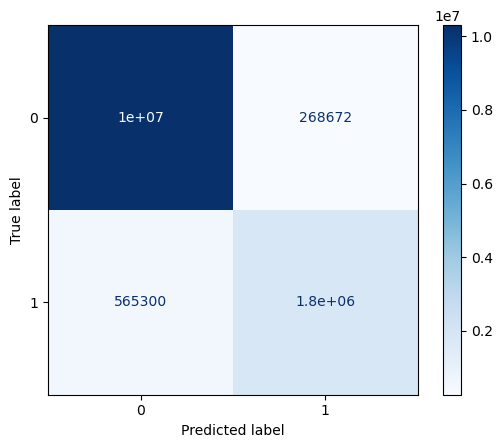

In [8]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_model.classes_)
disp.plot(cmap=plt.cm.Blues)  # You can change the colormap to something else if you like
plt.show()


In [9]:
#--------------ONLY FOR LOADING MODEL DO NOT RUN------------------------#
# Load the saved model from the file
loaded_model = joblib.load('logreg_model_raw.pkl')

# Make predictions with the loaded model
loaded_model_predictions = loaded_model.predict(X_test)
loaded_model_accuracy = accuracy_score(y_test, loaded_model_predictions)
print(f'Loaded model accuracy: {loaded_model_accuracy * 100:.2f}%')

Loaded model accuracy: 93.56%
